In [196]:
import numpy as np

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()

In [197]:
path_to_train = '../data/USPS_train.txt'
path_to_test = '../data/USPS_test.txt'

X_train, y_train = load_usps(path_to_train)
X_test, y_test = load_usps(path_to_test)

In [198]:
print(X_train.shape)
print(y_train.shape)

(7291, 256)
(7291,)


In [199]:
from SequentielNet import Sequentiel, Optim, SGD
from LinearModel import Linear
from MultiClass import CELossSoftMax
from NonLinearModel import Tanh, Sigmoid, SoftMax
import matplotlib.pyplot as plt
import numpy as np

In [200]:
batch = 64
input = 256
output1 = 128
output2 = 64
output3 = 10

epochs = 100

D:\SchoolWork\M1S2\ML\M1S2-ML-Projet\src\NonLinearModel.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


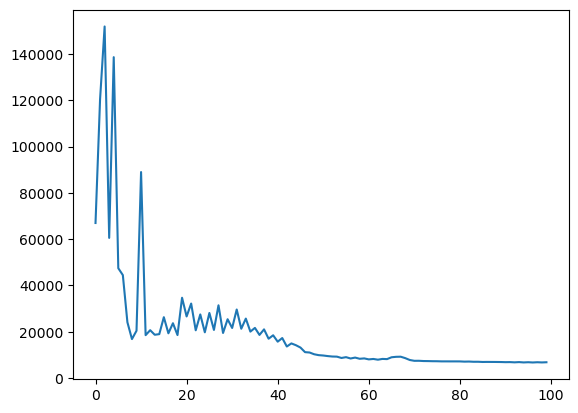

In [201]:
net = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3))
optim = Optim(net, CELossSoftMax(), 1e-3)
scores = []

for iteration in range(epochs):
    optim.zero_score()
    optim.step(X_train, y_train)
    optim.update_output()
    scores.append(optim.score.sum())


plt.plot(np.arange(epochs), scores)
plt.show()


In [202]:
optim.y_hat

array([[  8.068607  , -15.70821406,   4.48346959, ..., -13.43777088,
         -4.12942198, -10.50796308],
       [ -4.54614682,   1.15780215,  -0.37707026, ..., -10.39973603,
         -1.61584775,  -5.20468211],
       [ 20.3537892 , -85.47387762, -22.13434154, ...,  15.27829033,
         11.32186575,  22.60102894],
       ...,
       [  8.14665833, -44.57943154, -27.61914422, ...,   3.32409066,
         10.71435248,   9.5604202 ],
       [ 17.89851396, -52.12132234,  -4.54339381, ...,  -4.64960193,
          3.24825052,  -3.5686557 ],
       [ -1.26163274,  -1.29500804,   1.64781923, ...,  -0.48329011,
          0.89254298,   0.40873984]])

In [203]:
softmax = SoftMax()

In [204]:
print(softmax.forward(optim.y_hat))

[[2.19868378e-15 1.03757761e-25 6.09757819e-17 ... 1.00475814e-24
  1.10822028e-20 1.88131230e-23]
 [7.30541341e-21 2.19198894e-18 4.72336756e-19 ... 2.09634765e-23
  1.36854006e-19 3.78134719e-21]
 [4.75937157e-10 5.21408227e-56 1.67953432e-28 ... 2.97364046e-12
  5.68898900e-14 4.50311906e-09]
 ...
 [2.37716887e-15 3.00199628e-38 6.96898204e-31 ... 1.91269404e-17
  3.09881346e-14 9.77347515e-15]
 [4.08542389e-11 1.59224024e-41 7.32555297e-21 ... 6.58741180e-21
  1.77299924e-17 1.94161803e-20]
 [1.95025382e-19 1.88623774e-19 3.57808023e-18 ... 4.24737933e-19
  1.68127117e-18 1.03639362e-18]]


In [205]:
from sklearn.metrics import accuracy_score

In [206]:
pred = np.argmax(softmax.forward(optim.y_hat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.6964751062954327


In [207]:
pred[1]

5

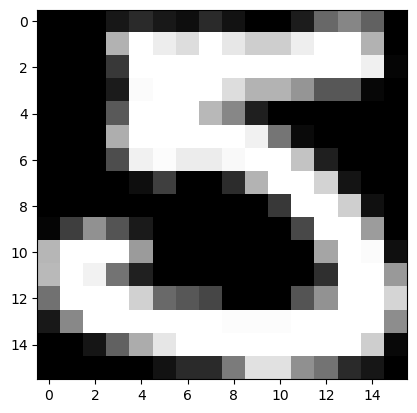

In [208]:
show_usps(X_train[1])

In [209]:
optim.step(X_test, y_test)
optim.update_output()

pred_test = np.argmax(softmax.forward(optim.y_hat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.6557050323866468


D:\SchoolWork\M1S2\ML\M1S2-ML-Projet\src\NonLinearModel.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
